# DSCI 6001 - 7.4: Principle Component Analysis

Here we detail an extension to SVD wherein we can calculate the prinicpal directions of deformity within the *data* itself. This is a common technique for detection of maximal elements of influence in large datasets, or to reduce the complexity of a large dataset down to something more manageable for regression. (no, not "Big Data" - "Big Data" only occurs when there is too much of it to store in a simple way.)

PCA is frequently used in the analysis of complex systems.

### Revisiting the Data Matrix

As has already been discussed previously, many data sets can be represented as an $n \times d$ matrix, where each row correspond to an instance or example and each column correspond to a property of interest or feature.

$${\bf D} = \left[ \begin{matrix} x_{11} & x_{12} & \cdots & x_{1d} \\ x_{21} & x_{22} & \cdots & x_{2d} \\ \vdots & \vdots & \ddots & \vdots \\ x_{n1} & x_{n2} & \cdots & x_{nd} \end{matrix} \right]$$

${\bf D}$ is called the _matrix of observations_ or simply _data matrix_. Any instance or example can then be represented as a vector in $d$-dimensional space:

$${\bf x}_i = \begin{bmatrix}x_{i1}\\x_{i2}\\ \vdots \\ x_{id}\end{bmatrix}$$

In this case

$${\bf D} = \left[ \begin{matrix} {\bf x}_1^T \\ \vdots \\ {\bf x}_n^T \end{matrix} \right]$$

We can also represent the columns of ${\bf D}$ as $n$-dimensional vectors:

$${\bf y}_j = [x_{1j} ~~ x_{2j} ~~ \cdots ~~ x_{nj}]$$

which allows us to represent the data matrix in terms of column vectors:

$${\bf D} = [{\bf y}_1 ~~ {\bf y}_2 ~~ \cdots ~~ {\bf y}_d]$$

We can specify a $d$-dimensional coordinate space using standard basis vectors ${\bf e}_i$. Each of the data points ${\bf x}_i$ can be written as linear combination of the standard basis vectors:

$${\bf x}_i = x_{i1} {\bf e}_1 + x_{i2} {\bf e}_2 + \cdots + x_{id} {\bf e}_d$$

where the scalar value $x_{ij}$ is the coordinate value along the $j$th axis or attribute.

## QUIZ: 

Express each of the data points $x_i$ belonging to the data matrix $A = \begin{bmatrix}2 & 4 & -1 \\ -1 & 2 & -4\end{bmatrix}$ with the standard basis.

### Mean and Variance

The mean of the data matrix is the vector obtained as the average of all the points:

$$mean({\bf D}) = {\bf \mu} = \frac{1}{n} \sum_{i=1}^n {\bf x}_i$$

Thus the $i$th component of the mean vector ${\bf \mu}$ is the average of the values of $i$th column of ${\bf D}$. That is

$${\bf \mu} = [\mu_1~~\mu_2~~\cdots~~\mu_d]^T$$

such that

$$\mu_j = \frac{1}{n} \sum_{i=1}^n x_{ij} ~~~~~~\text{for each }j=1,2,\cdots,d$$

The _total variance_ of the data matrix is the average squared distance of each point from the mean:

$$var({\bf D}) = \frac{1}{n} \sum_{i=1}^n \| {\bf x}_i - {\bf \mu} \|^2$$
$$var({\bf D}) = \frac{1}{n} \sum_{i=1}^n \left \{ (x_{i1} - \mu_1)^2 + (x_{i2} - \mu_2)^2 + \cdots + (x_{id} - \mu_d)^2 \right\}$$

Thus the total variance is the sum of variances of the columns of ${\bf D}$. This can also be expressed as

$$var({\bf D}) = \frac{1}{n} \left( \sum_{i=1}^n \| {\bf x}_i \|^2 \right ) - \| \mu \|^2$$

Thus the total variance is the difference between the average of the squared magnitude of the data points and the squared magnitude of the mean.

### QUIZ: 

What is the total variance of the data matrix $A = \begin{bmatrix}2 & 4 & -1 \\ -1 & 2 & -4\end{bmatrix}$ ?

### Mean-deviation Form

In many applications we need to _center the data matrix_ by subtracting the mean from all the data points:

$${\bf \hat{x}}_i = {\bf x}_i - {\bf \mu}$$

This gives us a new data matrix 

$${\bf Z} = \left[ \begin{matrix} {\bf \hat{x}}_1^T \\ \vdots \\ {\bf \hat{x}}_n^T \end{matrix} \right] = \left[ \begin{matrix} ({\bf x}_1 - {\bf \mu})^T \\ \vdots \\ ({\bf x}_n - {\bf \mu})^T \end{matrix} \right] = \left[ \begin{matrix} x_{11} - \mu_1 & \cdots & x_{1d} - \mu_d \\ \vdots & \ddots & \vdots \\ x_{n1} - \mu_1 & \cdots & x_{nd} - \mu_d \end{matrix} \right]$$

$\bf Z$ is called _centered data matrix_ for _mean-deviation form_, because $mean({\bf Z}) = {\bf 0}$, that is the mean coincides with the origin of the data space.

### Covariance Matrix

The covariance matrix is a $d \times d$ symmetric matrix that gives the covariance for each pair of attributes

$${\bf \Sigma} = \left[ \begin{matrix} \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1d} \\ \sigma_{21} & \sigma_2^2 & \cdots & \sigma_{2d} \\ \vdots & \vdots & \ddots & \vdots \\ \sigma_{d1}^2 & \sigma_{d2} & \cdots & \sigma_d^2 \end{matrix} \right]$$

The diagonal elements $\sigma_j^2$ specity the variance of $j$th attribute or column of $\bf D$, whereas the off-diagonal elements $\sigma_{jk} = \sigma_{kj}$ represent the covariance between pairs of columns.

$$\sigma_j^2 = \frac{1}{n} \sum_{i=1}^n (x_{ij} - \mu_j)^2$$

$$\sigma_{jk} = \frac{1}{n} \sum_{i=1}^n (x_{ij} - \mu_j)(x_{ik} - \mu_k)$$

If we represent columns of $\bf Z$ with $n$-dimensional vector ${\bf z}_j$:

$${\bf z}_j = \left[ \begin{matrix} x_{1j} - \mu_j \\ \vdots \\ x_{nj} - \mu_j \end{matrix} \right]$$

then we can write variances in a compact form:

$$\sigma_j^2 = \frac{1}{n} {\bf z}_j^T {\bf z}_j~~~~~\text{and}~~~~~\sigma_{jk} = \frac{1}{n} {\bf z}_j^T {\bf z}_k$$

The covariance matrix can be written in a compact form using the centered data matrix as

$${\bf \Sigma} = \frac{1}{n} {\bf Z}^T {\bf Z}$$

This is often called the *scatter matrix*.

In terms fo the centered points ${\bf \hat{x}}^T_i$, the covariance matrix can also be written as a sum of rank-one matrices obtained as the outer product of each centered point:

$${\bf \Sigma} = \frac{1}{n} \left[ \begin{matrix} {\bf \hat{x}}_1 & \cdots & {\bf \hat{x}}_n \end{matrix} \right]  \left[ \begin{matrix} {\bf \hat{x}}_1^T \\ \vdots \\ {\bf \hat{x}}_n^T \end{matrix} \right] = \frac{1}{n} \sum_{i=1}^n {\bf \hat{x}}_i {\bf \hat{x}}_i^T$$

## QUIZ:

Give the scatter matrix of $A$ given above.

### Principle Component Analysis

Given a set of $d$ orthonormal vectors ${\bf u}_1, {\bf u}_2, \cdots, {\bf u}_d$, we can re-express each data point ${\bf x}$ as the linear combination

$${\bf x} = a_1 {\bf u}_1 + a_2 {\bf u}_2 + \cdots + a_d {\bf u}_d$$

or

$${\bf x} = {\bf U a}$$

where ${\bf U} = [{\bf u}_1 ~~ {\bf u}_2 ~~ \cdots {\bf u}_d]$ is orthogonal matrix, and the vector ${\bf a} = 
\begin{bmatrix}a_1 \\ a_2 \\ \vdots \\ a_n\end{bmatrix}$ represents the coordinates of $\bf x$ in the new basis $\{{\bf u}_1, {\bf u}_2, \cdots, {\bf u}_d\}$. Multiplying above equation with ${\bf U}^T$, we get

$${\bf a} = {\bf U}^T {\bf x}$$

The goal of principle component analysis is to find a basis that best captures the variance of the data, and makes the covariance matrix diagonal.

The projection of a point ${\bf x}_i$ onto a unit vector $\bf u$ is

$${\bf x}_i = \frac{{\bf u}^T {\bf x}_i}{{\bf u}^T {\bf u}} {\bf u} = ({\bf u}^T {\bf x}_i){\bf u} = a_i {\bf u}$$

where $a_i$ is the component of ${\bf x}_i$ along $\bf u$.

$$ $$
<img src="./img/3.4-pca.png" width=250>

We wish to choose a direction $\bf u$ such that the variance of the projected points $a_i$ is maximized. The projected variance along $\bf u$ is given by

$$\sigma_{\bf u}^2 = \frac{1}{n} \sum_{i=1}^{n} (a_i - {\bf \mu_u})^2$$

If we assume that the data has been centered, then ${\bf \mu} = 0$, and the coordinates of $\bf \mu$ along $\bf u$ will also be zero, _i.e._, ${\bf \mu_u} = 0$.

$$\sigma_{\bf u}^2 = \frac{1}{n} \sum_{i=1}^{n} a_i^2 = \frac{1}{n} \sum_{i=1}^{n} ({\bf u}^T {\bf x}_i)^2$$

$$\sigma_{\bf u}^2 = {\bf u}^T \left( \frac{1}{n} \sum_{i=1}^{n} {\bf x}_i {\bf x}_i^T \right) {\bf u} = {\bf u}^T {\bf \Sigma u}$$

$$\implies {\bf \Sigma u} = \sigma_{\bf u}^2 {\bf u}$$

This is an eigenvalue equation. Thus the direction $\bf u$, that maximizes the variance $\sigma^2_{\bf u}$ is the eigenvector of $\bf \Sigma$ corresponding to the largest eigenvalue.

Let $\lambda_1, \lambda_2, \cdots, \lambda_d$ be the eigenvlaues of $\bf \Sigma$ such that $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_d \ge 0$. Since $\bf \Sigma$ is symmetric matrix we can diagonalize $\Sigma$:

$${\bf \Sigma} = {\bf U \Lambda U}^T$$

where

$${\bf U} = \begin{bmatrix} {\bf u}_1 & \cdots & {\bf u}_d \end{bmatrix}, ~~~~ \text{and} ~~~~ {\bf \Lambda} = \begin{bmatrix} \lambda_1 & & \\ & \ddots & \\ & & \lambda_d \end{bmatrix} = \begin{bmatrix} \sigma_1^2 & & \\ & \ddots & \\ & & \sigma_d^2 \end{bmatrix}$$



The eigenvectors ${\bf u}_1, {\bf u}_2, \cdots, {\bf u}_d$ of the covariance matrix are called the principle components of the data. The first principle component is the eigenvector corresponding to the largest eigenvalue of $\bf \Sigma$, the second principle component is the eigenvector corresponding to the second largest eigenvalue, and so on.

The new data matrix in the basis $\{{\bf u}_1, {\bf u}_2, \cdots, {\bf u}_d\}$ is given by

$${\bf A} = \left[ \begin{matrix} {\bf a}_1^T \\ {\bf a}_2^T \\ \vdots \\ {\bf a}_n^T \end{matrix} \right] = \left[ \begin{matrix} {\bf x}_1^T {\bf U} \\ {\bf x}_2^T {\bf U} \\ \vdots \\ {\bf x}_n^T {\bf U} \end{matrix} \right] = \left[ \begin{matrix} {\bf x}_1^T \\ {\bf x}_2^T \\ \vdots \\ {\bf x}_n^T \end{matrix} \right] {\bf U} = {\bf ZU}$$

(Since ${\bf a} = {\bf U}^T {\bf x}$, which implies ${\bf a}^T = {\bf x}^T {\bf U}$.) Note that we can also trasform $\bf D$ instead of $\bf Z$.

The covariance matrix of $\bf A$ is

$$\frac{1}{n} {\bf A}^T {\bf A} = \frac{1}{n} ({\bf ZU})^T ({\bf ZU}) = \frac{1}{n} {\bf U}^T {\bf Z}^T {\bf ZU} = {\bf U}^T {\bf \Sigma U}$$

Thus

$$\frac{1}{n} {\bf A}^T {\bf A} = {\bf \Lambda}$$

Thus the covariance matrix in the new basis is necessarily diagonal. There are no correlations between the column vectors of $\bf A$. Total variance of $\bf A$ is simply the sum of the diagonal elements of $\bf \Lambda$:

$$var({\bf A}) = \sum_{i=1}^n \lambda_i = \sum_{i=1}^n \sigma_i^2 = var({\bf Z}) = var({\bf D})$$

###Dimensionality Reduction



PCA provides a powerful tool for reducing the dimensionality, and therefore compressing, data. This is done by removing partial components with little information and only reporting those that are most meaningful.

The matrix $\bf A$ represents the data in a $d$ dimensional space defined by the eigenvectors of the covariance matrix. That is, each data point is given with respect to new basis $\{{\bf u}_1, \cdots, {\bf u}_d\}$.

One can reduce the dimensionality of data by neglecting those eigenvectors ${\bf u}_i$ corresponding to smaller eigenvalues $\lambda_i$. Thus the reduced data matrix is given as:

$${\bf A}_r = {\bf D U}_r, ~~~~~ \text{where}~~ {\bf U}_r = \begin{bmatrix} {\bf u}_1 & \cdots & {\bf u}_r \end{bmatrix} \text{  such that } r < d$$

Often we may not know how many dimensions, $r$, to use for a good approximation. One criteria for choosing $r$ is to compute the fraction of the total variance captured by the first $r$ principal components, computed as

$$f(r) = \frac{\sum_{i=1}^r \lambda_i}{\sum_{i=1}^d \lambda_i} = \frac{var({\bf A}_r)}{var({\bf D})}$$

The result of this calculation is called a *scree plot*.

Given a certain desired variance threshold, say $\alpha$, starting from the first principal component, we keep on adding additional components, and stop at the smallest value $r$, for which $f(r) \ge \alpha$. In other words, we select the fewest number of dimensions such that the subspace spanned by those $r$ dimensions captures at least $\alpha$ fraction of the total variance. In practice, $\alpha$ is usually set to $0.9$ or higher, so that the reduced dataset captures at least $90\%$ of the total variance.

### Connection between PCA and SVD

Condsider the singular value decomposition of the centered data matrix:

$${\bf Z} = {\bf L \Delta R}^T$$

(I've changed the notation here for clarity.) We can calculate the product ${\bf Z}^T {\bf Z}$:

$${\bf Z}^T {\bf Z} = ({\bf L \Delta R}^T)^T {\bf L \Delta R}^T$$

Since ${\bf L}$ is an orthogonal matrix, the above expression simplifies to

$${\bf Z}^T {\bf Z} =  {\bf R} (\Delta^T \Delta) {\bf R}^T =  {\bf R \Delta}^2_d {\bf R}^T$$

where ${\bf \Delta}^2$ is a $d \times d$ matrix:

$${\bf \Delta}_d^2 = \begin{bmatrix} \delta_1^2 & & \\ & \ddots & \\ & & \delta_d^2 \end{bmatrix}$$

From diagonalization of $\bf \Sigma$, we get the following:

$${\bf Z}^T {\bf Z} = n {\bf U \Lambda U}^T = {\bf U} (n {\bf \Lambda}){\bf U}^T$$

Comparing the above two decompositoins of ${\bf Z}^T {\bf Z}$, we have

$${\bf U} = {\bf R}, ~~~~~ \text{and} ~~~~~ {\bf \Delta}_d^2 = n{\bf \Lambda}$$

Also, $n \lambda_i = n\sigma_i^2 = \delta_i^2$.

### EXAMPLE:

The time, $T$ (in min), it takes for a runner to complete a marathon is given in the following table along with three independent variables:

| T | x1 | x2 | x3 |
|-|
| 181 | 13.1 | 619 | 23 |
| 193 | 13.5 | 803 | 42 |
| 212 | 13.8 | 207 | 31 |
| 221 | 13.1 | 409 | 38 |
| 248 | 12.5 | 482 | 45 |

Here

$$x_1 = \text{Ponderal index} = \frac{\text{height (in.)}}{\left[\text{weight (lbs.)} \right]^{1/3}}$$

$$x_2 = \text{Miles run the previous 8 weeks}$$

$$x_3 = \text{Age (years)}$$

(a) On the basis of these observations, estimate the expected marathon time for a 43-year-old runner of height 74 in., weight 180 lbs., who has run 450 miles during the previous eight weeks.


(b) Transform the data matrix using PCA. Compare the covariance matrix of new data set with the actual data.

(c) From the new data set, drop the column corresponding to the smallest eigenvale. Using the reduced data matrix, stimate the expected marathon time for a 43-year-old runner of height 74 in., weight 180 lbs., who has run 450 miles during the previous eight weeks.

(d) Plot $T$ vs the first two principle components.

(e) Use [scikit learn PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to obtain first two principle components. Compare your results with scikit learn PCA.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
# this is from exercise 4
y = np.array([[181],[193], [212], [221], [248]])
A = np.array([[1, 13.1, 619, 23], 
              [1, 13.5, 803, 42], 
              [1, 13.8, 207, 31],
              [1, 13.1, 409, 38],
              [1, 12.5, 482, 45]])

ATransA = A.T.dot(A) 
AtranY = A.T.dot(y)
ATransAinv = np.linalg.inv(ATransA)
b = (ATransAinv.dot(A.T)).dot(y)


print b
print A.dot(b)
print y
e = A.dot(b) - y #error vector
print "Error: ", e.T.dot(e)[0][0]

#new data vector
x = np.array([[1],[74./(180**(1./3))],[450],[43]])
print 'prediction: ', b.T.dot(x)[0][0]

[[  4.92044229e+02]
 [ -2.34354608e+01]
 [ -7.61338932e-02]
 [  1.86243954e+00]]
[[ 180.7489223 ]
 [ 192.75245283]
 [ 210.61078004]
 [ 224.67363291]
 [ 246.21421193]]
[[181]
 [193]
 [212]
 [221]
 [248]]
Error:  18.7388695211
prediction:  230.720860799


In [9]:
#Implementation fo PCA

X = A[:,1:4]

mu = X.mean(axis=0)

Z = X - mu


V, S, Vt = np.linalg.svd(Z)
V = Vt.T  # svd return transpose of V

#now drop one column

print V
print S
Vr = V[:,0:2]
Vr

[[  3.75052530e-04   1.93093437e-02   9.99813487e-01]
 [ -9.99975580e-01   6.98442302e-03   2.40223551e-04]
 [ -6.97848178e-03  -9.99789161e-01   1.93114917e-02]]
[ 447.60894804   17.46915267    0.90462105]


array([[  3.75052530e-04,   1.93093437e-02],
       [ -9.99975580e-01,   6.98442302e-03],
       [ -6.97848178e-03,  -9.99789161e-01]])

In [10]:
#create new data matrix
Ar = Z.dot(Vr)
#print Ar

# linear regression
Ar = np.hstack((np.ones((5,1)), Ar))

print Ar

ATransA = Ar.T.dot(Ar) 
AtranY = Ar.T.dot(y)
ATransAinv = np.linalg.inv(ATransA)
b = (ATransAinv.dot(Ar.T)).dot(y)
print 'beta coefficients:\n',b

e = Ar.dot(b) - y #error vector
print "Error: ", e.T.dot(e)[0][0]

x = np.array([[74./(180**(1./3))],[450],[43]])
x = x - mu.reshape(x.shape)

a = Vr.T.dot(x) # convert x to new basis

a = np.vstack((np.array([[1]]), a))
print 'prediction: ', b.T.dot(a)[0][0]

[[   1.         -114.90790461   13.59857898]
 [   1.         -299.03585242   -4.10455751]
 [   1.          297.02646893    2.73619994]
 [   1.           94.98228991   -2.86498728]
 [   1.           21.93499819   -9.36523413]]
beta coefficients:
[[  2.11000000e+02]
 [  5.43455048e-02]
 [ -2.31510198e+00]]
Error:  466.642654857
prediction:  231.474430738


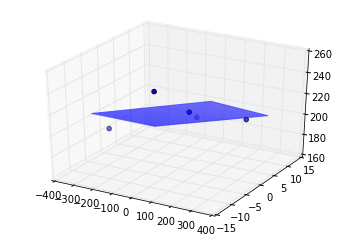

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = Ar[:,1:2]
x2 = Ar[:,2:3]

ax.scatter(x1, x2, y);

x1 = np.arange(x1.min(), x1.max(), 2)
x2 = np.arange(x2.min(), x2.max(), 20)
x1, x2 = np.meshgrid(x1,x2)

y1 = b[0][0] + b[1][0]*x1 + b[2][0]*x2 # fit function

ax.plot_wireframe(x1, x2, y1, rstride=4, cstride=4, alpha=0.4,cmap=cm.jet);